In [1]:
from google.colab import drive
import numpy as np
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


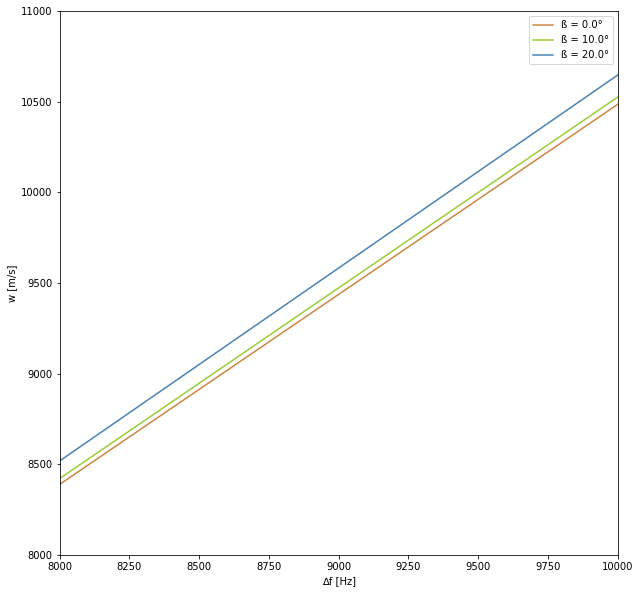

In [17]:
beta = np.linspace(0,140,15) # l'angle bistatique en degrés
beta = np.linspace(0,20,3) # l'angle bistatique en degrés
f_TX = 143.05e6 # fréquence de graves en Hz (1/s)
c = 3e8 # vitesse de la lumière en m/s

x_size = 100
delta_f_arr = np.linspace(0,10000,x_size)
# Il faut 15 couleurs 
colors = ["peru","yellowgreen","steelblue","mediumblue","darkviolet","crimson","orange","darkorchid","darkgreen","olive","cyan","gold","saddlebrown","rosybrown","seagreen",]
count = 0
plt.figure(figsize = (10,10))
for angle in beta:
  angle_r = angle * np.pi / 180
  w_arr = (c*delta_f_arr)/(2*f_TX*np.cos(angle_r/2))
  plt.plot(delta_f_arr,w_arr, label='ß = {0}°'.format(angle),color = colors[count])
  count += 1
  
images_dir = '/content/drive/MyDrive/Projet technologies spatiales'
plt.xlabel("∆f [Hz]")
plt.ylabel("w [m/s]")
plt.xlim(8000,10000)
plt.ylim(8000,11000)
plt.legend()
plt.savefig(f'{images_dir}/w(delta_f).jpeg',dpi = 500)
plt.show()

150370.0


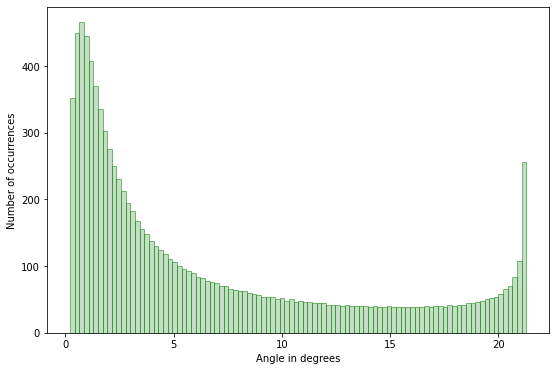

In [13]:
Dijon = np.array((-150.37e3/2,0))
Lausanne = np.array((150.37e3/2,0))
D_to_L = np.linalg.norm(Dijon-Lausanne)
print(D_to_L)

col_in = ['royalblue',"mediumvioletred","darkseagreen"]
col_contour = ['darkblue',"purple","green"]
count_color = 0

plt.figure(figsize = (9,6))
def f(a_dist_suppl,hauteur): # distance en metres
  a = D_to_L + a_dist_suppl
  b = hauteur # hauteur vertical à équidistance entre dijon et lausanne

  x = np.linspace(-a,a,10000)
  y = b*np.sqrt(1-(x/a)**2)

  beta_max = 0
  beta_min = 1000
  beta_lst = []
  for idx in range(len(x)-1):
    point = np.array((x[idx],y[idx]))
    A = D_to_L
    B = np.linalg.norm(point-Dijon)
    C = np.linalg.norm(point-Lausanne)
    beta = np.arccos((B**2 + C**2 -A **2)/(2*B*C))
    beta = beta*180/np.pi 

    if (beta > beta_max):
      beta_max = beta
    if (beta < beta_min):
      beta_min = beta

    beta_lst.append(beta)

  nbr = 100
  x_plot = np.linspace(beta_min,beta_max,nbr)
  x_plot2 = x_plot[1:len(x_plot)]
  y_plot2 = []
  step = (beta_max-beta_min)/(nbr-1)

  for elem in beta_lst:
    idx = int(elem//step)
    y_plot2.append(idx*step)
    
  plt.hist(y_plot2,bins = x_plot2,color = col_in[count_color],edgecolor = col_contour[count_color],alpha = 0.5)


#f(500e3,400e3)
count_color+=1
#f(1000e3,400e3)
count_color+=1
f(1500e3,400e3)
#count_color+=1

plt.ylabel('Number of occurrences')
plt.xlabel('Angle in degrees')
#plt.savefig(f'{images_dir}/pdf_beta_1500.jpeg',dpi = 500)
plt.show()

